# World Happiness Report

__Americas Polo Tech__

Módulo 06 - Big Data
Projeto Final

Dataset ['World Happiness Report'](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021)

In [0]:
import pyspark.pandas as pd


In [0]:
# path_dataset = '/dbfs/FileStore/shared_uploads/hebertcostajhale@gmail.com/world_happiness_report-1.csv'
path_dataset = "/FileStore/shared_uploads/hebertcostajhale@gmail.com/ds_world_happiness_report.csv"
df_happiness = pd.read_csv(path_dataset)

## 1st Impressions

In [0]:
n_rows, n_cols = df_happiness.shape
print(f'Columns: {df_happiness.columns.to_list()}')
print(n_rows, n_cols)

Columns: ['Country name', 'year', 'Life Ladder', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']
1949 11


In [0]:
df_happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [0]:
df_happiness.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int32  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int32(1), object(1)

In [0]:
df_happiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749000,58.680000,0.647000,-0.113000,0.690000,0.625000,0.206000
50%,2013.000000,5.386000,9.460000,0.835000,65.200000,0.763000,-0.026000,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.600000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [0]:
MAX_CATEG_VALUES = 10
cols_dual = []
cols_categorical = []

for col in df_happiness:
    n_unique = df_happiness[col].nunique()
    print(f'"{col}": {df_happiness[col].nunique()} unique values')
    if n_unique == 2:
        cols_dual.append(col)
    elif n_unique <= MAX_CATEG_VALUES:
        cols_categorical.append(col)

print('- ' * 15)
print('cols_dual: ', cols_dual)

print('- ' * 15)
print('cols_categorical: ', cols_categorical)

"index": 1708 unique values
"Country name": 155 unique values
"year": 16 unique values
"Life Ladder": 1392 unique values
"Log GDP per capita": 1377 unique values
"Social support": 448 unique values
"Healthy life expectancy at birth": 799 unique values
"Freedom to make life choices": 521 unique values
"Generosity": 597 unique values
"Perceptions of corruption": 553 unique values
"Positive affect": 422 unique values
"Negative affect": 358 unique values
"Life Ladder [round]": 7 unique values
- - - - - - - - - - - - - - - 
cols_dual:  []
- - - - - - - - - - - - - - - 
cols_categorical:  ['Life Ladder [round]']


In [0]:
df_happiness['Country name'].value_counts()

Out[54]: Russia                       15
Sweden                       15
Philippines                  15
Turkey                       15
Germany                      15
Cambodia                     15
Jordan                       15
France                       15
Argentina                    15
Ecuador                      15
Ghana                        15
China                        15
India                        15
United States                15
Chile                        15
Tajikistan                   15
Bolivia                      15
Italy                        15
Lithuania                    15
Spain                        15
Denmark                      15
Bangladesh                   15
Thailand                     15
Ukraine                      15
Venezuela                    15
Israel                       15
South Korea                  15
Uruguay                      15
Mexico                       15
Georgia                      15
Zimbabwe                     15

In [0]:
df_happiness['year'].value_counts()

Out[55]: 2017    147
2011    146
2014    145
2019    144
2015    143
2018    142
2012    142
2016    142
2013    137
2010    124
2009    114
2008    110
2007    102
2020     95
2006     89
2005     27
Name: year, dtype: int64

In [0]:
df_happiness['Life Ladder'].value_counts()

Out[56]: 5.252    5
4.741    4
5.057    4
6.375    4
5.786    4
5.304    4
4.967    3
6.126    3
5.081    3
6.086    3
5.648    3
5.840    3
4.609    3
6.690    3
5.514    3
5.062    3
7.257    3
5.296    3
5.767    3
3.476    3
7.321    3
6.798    3
6.019    3
4.669    3
5.701    3
6.378    3
5.711    3
4.595    3
5.172    3
6.568    3
5.132    3
6.309    3
6.168    3
5.006    3
5.936    3
4.514    3
5.911    3
4.725    3
5.901    3
6.854    3
4.683    3
5.104    3
4.350    3
5.467    3
5.004    3
4.574    3
4.653    3
5.385    3
5.386    3
5.074    3
6.241    3
4.785    3
4.640    3
5.220    3
5.866    3
5.885    3
3.795    3
6.561    3
5.397    3
5.464    3
5.937    3
5.095    3
5.168    3
5.887    3
4.632    2
5.608    2
3.826    2
5.882    2
5.955    2
3.955    2
5.225    2
3.570    2
7.097    2
5.605    2
3.977    2
6.513    2
5.311    2
4.431    2
7.415    2
5.186    2
5.821    2
5.964    2
6.118    2
5.993    2
6.910    2
4.909    2
4.573    2
6.965    2
5.476    2
5.208    2
4

### Checking for problems

In [0]:
df_happiness.isna().sum()

Out[57]: Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [0]:
100 * (df_happiness.isna().sum() / n_rows)

Out[58]: Country name                        0.000000
year                                0.000000
Life Ladder                         0.000000
Log GDP per capita                  1.847101
Social support                      0.667009
Healthy life expectancy at birth    2.821960
Freedom to make life choices        1.641868
Generosity                          4.566444
Perceptions of corruption           5.643920
Positive affect                     1.128784
Negative affect                     0.820934
dtype: float64

In [0]:
df_happiness.duplicated().sum() # No duplicated data
# df_happiness[df_happiness.duplicated()]

Out[59]: 0

## Data Manipulation

### Handle nullish values

In [0]:
# Dropping nullish rows
df_happiness = df_happiness.dropna().reset_index()
n_rows, n_cols = df_happiness.shape

print(f'n_rows: {n_rows}, n_cols: {n_cols}')
df_happiness.isna().sum()


n_rows: 1708, n_cols: 12
Out[146]: index                               0
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

### Categorical feature (Life ladder)

In [0]:
col_categ_life_ladder = 'Life Ladder [round]'
df_happiness[col_categ_life_ladder] = df_happiness['Life Ladder'].round().astype('int')
df_happiness[col_categ_life_ladder].value_counts()

Out[158]: 5    539
6    438
4    330
7    299
3     53
8     48
2      1
Name: Life Ladder [round], dtype: int64

In [0]:
from pyspark.ml.feature import OneHotEncoder

df_spark = df_happiness.to_spark()

encoder = OneHotEncoder(inputCol=col_categ_life_ladder, outputCol=col_categ_life_ladder+"vec")
df_enc = encoder.fit(df_spark).transform(df_spark)
display(df_enc)

index,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder [round],Life Ladder [round]vec
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))"
1,Afghanistan,2009,4.402,7.54,0.552,51.2,0.679,0.19,0.85,0.584,0.237,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))"
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.6,0.121,0.707,0.618,0.275,5,"Map(vectorType -> sparse, length -> 8, indices -> List(5), values -> List(1.0))"
3,Afghanistan,2011,3.832,7.62,0.521,51.92,0.496,0.162,0.731,0.611,0.267,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))"
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.71,0.268,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))"
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))"
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,3,"Map(vectorType -> sparse, length -> 8, indices -> List(3), values -> List(1.0))"
7,Afghanistan,2015,3.983,7.702,0.529,53.2,0.389,0.08,0.881,0.554,0.339,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))"
8,Afghanistan,2016,4.22,7.697,0.559,53.0,0.523,0.042,0.793,0.565,0.348,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))"
9,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371,3,"Map(vectorType -> sparse, length -> 8, indices -> List(3), values -> List(1.0))"


In [0]:
df_happiness.info()

<class 'pyspark.pandas.frame.DataFrame'>
Int64Index: 1708 entries, 0 to 1707
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             1708 non-null   int64  
 1   Country name                      1708 non-null   object 
 2   year                              1708 non-null   int32  
 3   Life Ladder                       1708 non-null   float64
 4   Log GDP per capita                1708 non-null   float64
 5   Social support                    1708 non-null   float64
 6   Healthy life expectancy at birth  1708 non-null   float64
 7   Freedom to make life choices      1708 non-null   float64
 8   Generosity                        1708 non-null   float64
 9   Perceptions of corruption         1708 non-null   float64
 10  Positive affect                   1708 non-null   float64
 11  Negative affect                   1708 non-null   float64
 12  Lif

### Fields Groupping

In [0]:
df_happiness.columns.tolist()

Out[149]: ['index',
 'Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect',
 'Life Ladder [round]']

According to the dataset description, the fields contain information about the following criteria:

- Identification;
- Economic Production;
- Social Support;
- Life Expectancy;
- Freedom;
- Absence of Corruption;
- Generosity;

In [0]:
# So we group'em this way...

cols_id = ['Country name', 'year']
cols_economic = ['Log GDP per capita']
cols_social = ['Social support']
cols_life_expect = ['Healthy life expectancy at birth']
cols_freedom = ['Freedom to make life choices']
cols_corruption = ['Perceptions of corruption']
cols_generosity = ['Generosity']

Additionally there are these other fields that seems to have their meaning more related to personal perception of happiness / satisfaction itself:

[Source](https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021/discussion/244990)


- __Positive affect__:
    Average of 03 positive affect measures _(in Gallup World Poll)_: Happiness, laugh & enjoyment;

- __Negative affect__:
    Average of 03 positive negative measures _(in Gallup World Poll)_: Worry, sadness & anger;

- __Life Ladder__:
    Imagine a 10 steps ladder where top represents the best possible life. On which step you feel that you are?

In [0]:
# So we group'em this way...

cols_affect = ['Positive affect', 'Negative affect', 'Life Ladder', 'Life Ladder [round]']

In [0]:
cols_numeric = (
    cols_economic
    + cols_social
    + cols_life_expect
    + cols_freedom
    + cols_corruption
    + cols_generosity
    + cols_affect
)

cols_numeric

Out[152]: ['Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Perceptions of corruption',
 'Generosity',
 'Positive affect',
 'Negative affect',
 'Life Ladder',
 'Life Ladder [round]']

### Visualization

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/databricks/spark/python/pyspark/sql/pandas/conversion.py:119: UserWarning:

toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unable to convert the field pearson(__correlation_output__). If this column is not necessary, you may consider dropping it or converting to primitive type before the conversion.
Direct cause: Unsupported type in conversion to Arrow: MatrixUDT()
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.



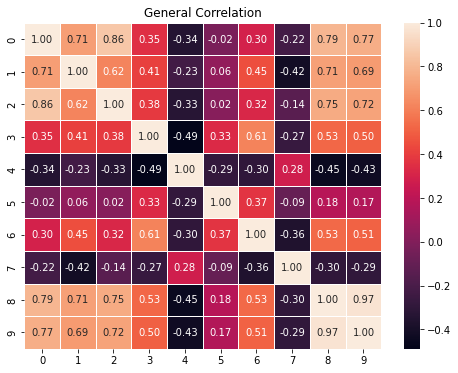

In [0]:
corr = df_happiness[cols_numeric].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr.to_numpy(), annot=True, fmt=".2f", linewidth=.7)

plt.title('General Correlation')
plt.show()

## Considerations

- Economy situation, expressed by 'Log GDP per capta', is the most influent feature of this dataset;
- The better the economic situation, the better the health and social services access and especially the life ladder position;
- The perception of freedom is also very influential to the life ladder score;
- But yet, even though these correlations are present, the life ladder score is close to normally distributed. This might indicate that people tend to have a standard generic answer for this score related type of questions;
- There are still further perceptions to be digged, especially with regard to geographical information;

## Regressor

In [0]:
# from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler
from pyspark.ml.feature import VectorAssembler
# from pyspark.sql.functions import regexp_replace

In [0]:
# ['Life Ladder [round]vec', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Positive affect', 'Negative affect']

cols_input = ['Life Ladder [round]vec', 'Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
target_pos = 'Positive affect'
target_neg = 'Negative affect'

assembler = VectorAssembler(inputCols=cols_input, outputCol='features')
df_final = assembler.transform(df_enc)
display(df_final)

index,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Life Ladder [round],Life Ladder [round]vec,features
0,Afghanistan,2008,3.724,7.37,0.451,50.8,0.718,0.168,0.882,0.518,0.258,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(4, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.37, 0.451, 50.8, 0.718, 0.168, 0.882))"
1,Afghanistan,2009,4.402,7.54,0.552,51.2,0.679,0.19,0.85,0.584,0.237,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(4, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.54, 0.552, 51.2, 0.679, 0.19, 0.85))"
2,Afghanistan,2010,4.758,7.647,0.539,51.6,0.6,0.121,0.707,0.618,0.275,5,"Map(vectorType -> sparse, length -> 8, indices -> List(5), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(5, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.647, 0.539, 51.6, 0.6, 0.121, 0.707))"
3,Afghanistan,2011,3.832,7.62,0.521,51.92,0.496,0.162,0.731,0.611,0.267,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(4, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.62, 0.521, 51.92, 0.496, 0.162, 0.731))"
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.71,0.268,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(4, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.705, 0.521, 52.24, 0.531, 0.236, 0.776))"
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(4, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.725, 0.484, 52.56, 0.578, 0.061, 0.823))"
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375,3,"Map(vectorType -> sparse, length -> 8, indices -> List(3), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(3, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.718, 0.526, 52.88, 0.509, 0.104, 0.871))"
7,Afghanistan,2015,3.983,7.702,0.529,53.2,0.389,0.08,0.881,0.554,0.339,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(4, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.702, 0.529, 53.2, 0.389, 0.08, 0.881))"
8,Afghanistan,2016,4.22,7.697,0.559,53.0,0.523,0.042,0.793,0.565,0.348,4,"Map(vectorType -> sparse, length -> 8, indices -> List(4), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(4, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.697, 0.559, 53.0, 0.523, 0.042, 0.793))"
9,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371,3,"Map(vectorType -> sparse, length -> 8, indices -> List(3), values -> List(1.0))","Map(vectorType -> sparse, length -> 14, indices -> List(3, 8, 9, 10, 11, 12, 13), values -> List(1.0, 7.697, 0.491, 52.8, 0.427, -0.121, 0.954))"


In [0]:
from pyspark.ml.feature import Normalizer

normalizer = Normalizer(inputCol="features", outputCol="normFeatures", p=1.0)
df_norm = normalizer.transform(df_final)

In [0]:
treino, teste = df_final.randomSplit([.8, .2], seed=42)

print(f'O Conjunto de treino tem: {treino.cache().count()} itens')
print(f'O Conjunto de teste tem: {teste.cache().count()} itens')



O Conjunto de treino tem: 1412 itens
O Conjunto de teste tem: 296 itens


In [0]:
from pyspark.ml.regression import LinearRegression

# reg = LinearRegression(featuresCol="features", labelCol=target_pos)
reg = LinearRegression(featuresCol="features", labelCol=target_neg)

model = reg.fit(treino)

print(f'Ele intercepta em :{model.intercept:.2f}')
print(f'Ele tem os Coefs em :{model.coefficients[0]:.2f} e {model.coefficients[1]:.2f} e o coef 7 é {model.coefficients[6]:.2f}')


Ele intercepta em :0.28
Ele tem os Coefs em :0.00 e 0.00 e o coef 7 é 0.02


In [0]:
df_prev = model.transform(teste)
# display(df_prev.select("features", 'selling_price', 'prediction'))


from pyspark.ml.evaluation import RegressionEvaluator

# regEv = RegressionEvaluator(predictionCol="prediction", labelCol=target_pos, metricName="rmse")
regEv = RegressionEvaluator(predictionCol="prediction", labelCol=target_neg, metricName="rmse")
rmse = regEv.evaluate(df_prev)

mse = regEv.setMetricName("mse").evaluate(df_prev)
r2 = regEv.setMetricName("r2").evaluate(df_prev)
mae = regEv.setMetricName("mae").evaluate(df_prev)

print(f"rmse: {rmse:0.2f}")
print(f"mse: {mse:0.2f}")
print(f"r2: {r2:0.2f}")
print(f"mae: {mae:0.2f}")

rmse: 0.07
mse: 0.01
r2: 0.29
mae: 0.05
